In [1]:
from sklearn.datasets import make_classification ## used to generate dataset
from matplotlib import pyplot as plt ## for plotting
from sklearn.linear_model import LogisticRegression ## Used for performing logistic regression
from sklearn.model_selection import train_test_split ## used to split dataset into training and test datasets
from sklearn.metrics import confusion_matrix ## used to generate the confusion matrix of the classifiers
import pandas as pd ## managing datasets
from sklearn.metrics import roc_curve,roc_auc_score ## used to generate roc curve and auc score

In [2]:
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
) ## Generate the dataset for logistic regression


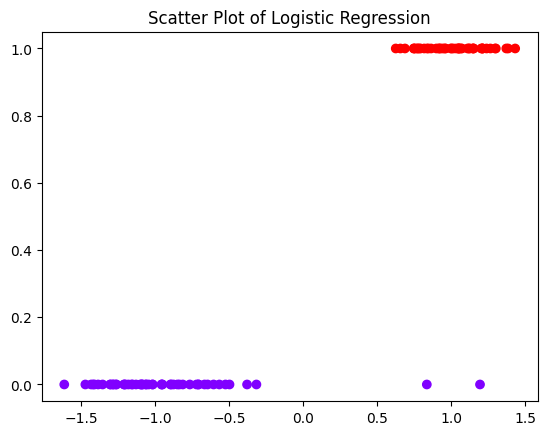

In [3]:
plt.scatter(x, y, c=y, cmap='rainbow') ## Create a scatter plot
plt.title('Scatter Plot of Logistic Regression')
plt.show()

In [4]:
df = pd.DataFrame({'x': x[:, 0], 'y': y})
print(df)

           x  y
0  -1.180262  0
1  -0.605140  0
2   1.299870  1
3   0.746556  1
4  -1.282667  0
..       ... ..
95 -1.613117  0
96  0.816267  1
97 -1.470848  0
98  1.430410  1
99  0.898130  1

[100 rows x 2 columns]


In [5]:
# Split the dataset into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)

In [6]:
# Create a Logistic Regression Object, perform Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

In [7]:
# Show to Coeficient and Intercept
print(log_reg.coef_)
print(log_reg.intercept_)

[[3.1664164]]
[-0.04328305]


In [9]:
# Perform prediction using the test dataset
y_pred = log_reg.predict(x_test)

In [10]:
# Show the Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[13,  2],
       [ 0, 10]])

In [11]:
y_pred_proba = log_reg.predict_proba(x_test)[:, 1]

In [12]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

In [13]:
roc_auc = roc_auc_score(y_test, y_pred_proba)

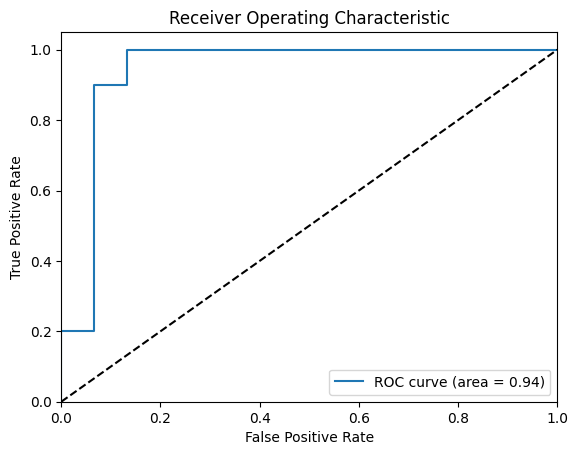

In [17]:
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [15]:
auc_score = roc_auc_score(y_test, y_pred_proba)
print(auc_score)

0.9400000000000001


In [18]:
##MultiClass Logistic Regression

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [20]:
data=pd.read_csv('Iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [21]:
data['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [22]:
data['Species'].replace({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3})
data

<ipython-input-22-d021d6de45af>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Species'].replace({'Iris-setosa':1,'Iris-versicolor':2,'Iris-virginica':3})


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [23]:
x_train,x_test,y_train,y_test=train_test_split(data[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']],data['Species'],train_size=0.2)

In [24]:
x_train
y_train

,Species
112,Iris-virginica
80,Iris-versicolor
38,Iris-setosa
105,Iris-virginica
10,Iris-setosa
91,Iris-versicolor
55,Iris-versicolor
40,Iris-setosa
116,Iris-virginica
2,Iris-setosa


In [25]:
from sklearn import linear_model
mymodel=linear_model.LogisticRegression()
mymodel.fit(x_train,y_train)


LogisticRegression()

In [26]:
mymodel.predict(x_test)

array(['Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'I

In [27]:
x_test

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
125,7.2,3.2,6.0,1.8
14,5.8,4.0,1.2,0.2
13,4.3,3.0,1.1,0.1
27,5.2,3.5,1.5,0.2
42,4.4,3.2,1.3,0.2
...,...,...,...,...
118,7.7,2.6,6.9,2.3
137,6.4,3.1,5.5,1.8
83,6.0,2.7,5.1,1.6
138,6.0,3.0,4.8,1.8


In [28]:
mymodel.score(x_test,y_test)

0.8416666666666667

In [29]:
predicted_output=mymodel.predict(x_test)
predicted_output


array(['Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'I

In [30]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predicted_output)
cm

array([[38,  0,  0],
       [ 0, 35,  6],
       [ 0, 13, 28]])

Text(50.722222222222214, 0.5, 'Truth')

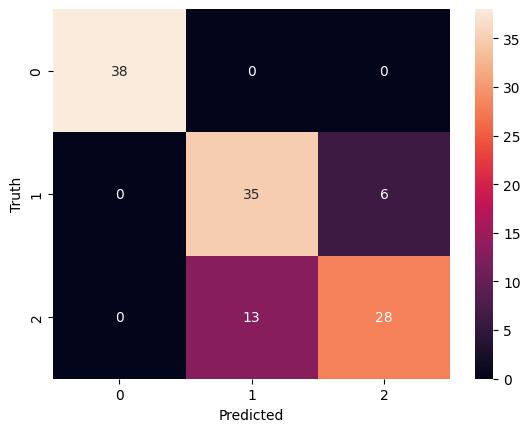

In [31]:
import seaborn as sn
from matplotlib import pyplot as plt
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')